Project:Weather Predicitng System
DOMAIN:MACHINE LEARNING USING PYTHON

First, we import the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def resizeplot():
    plt.figure(figsize=(12,6))

In [4]:
def resizecorr():
    plt.figure(figsize=(15,7))

#This function it is for correlations plots

*  Load the data:

In [5]:
df = pd.read_csv('input/weathercsv/weather.csv')

In [6]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


* Let's see if there are missing data.

In [7]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

* We have some missing data. We will visualize them better in the graph.

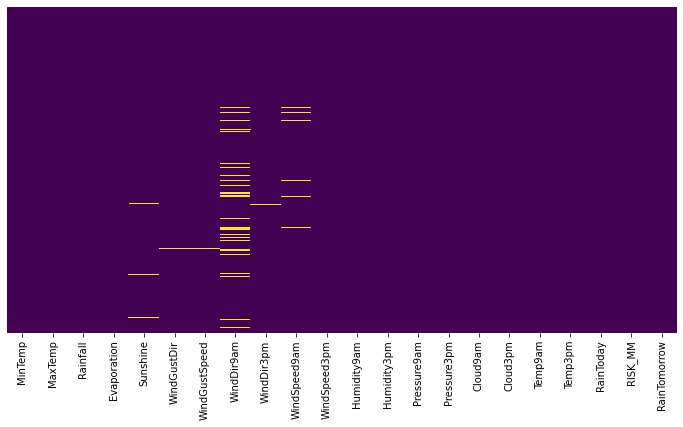

In [8]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
from sklearn.impute import KNNImputer

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer_int = KNNImputer(missing_values=np.nan)

In [12]:
df['Sunshine'] = imputer_int.fit_transform(df[['Sunshine']])

In [13]:
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [14]:
df['WindGustDir'] = imputer_str.fit_transform(df[['WindGustDir']])

In [15]:
df['WindGustSpeed'] = imputer_int.fit_transform(df[['WindGustSpeed']])

In [16]:
df['WindDir9am'] = imputer_str.fit_transform(df[['WindDir9am']])

In [17]:
df['WindDir3pm'] = imputer_str.fit_transform(df[['WindDir3pm']])

In [18]:
df['WindSpeed9am'] = imputer_int.fit_transform(df[['WindSpeed9am']])

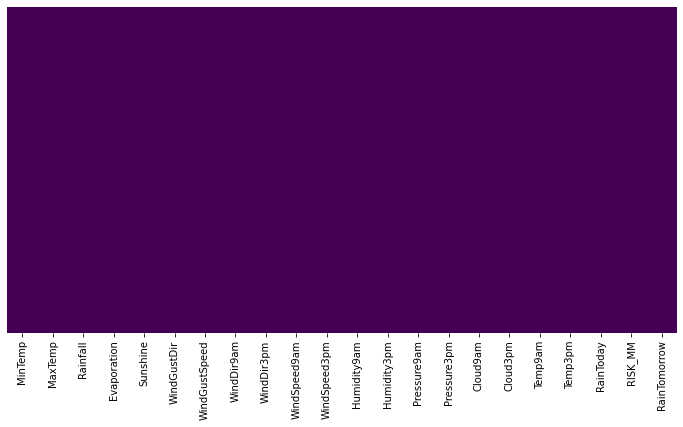

In [19]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df.drop('RISK_MM', inplace=True,axis=1)

In [21]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


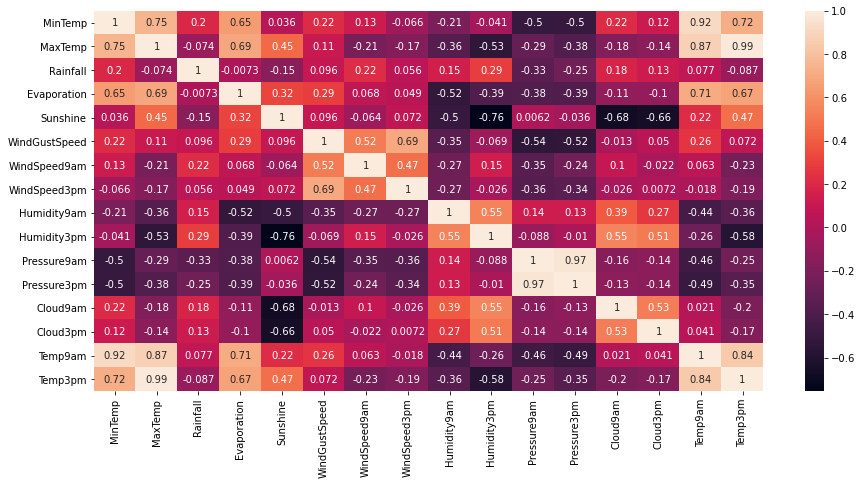

In [22]:
resizecorr()
sns.heatmap(df.corr(),annot=True)

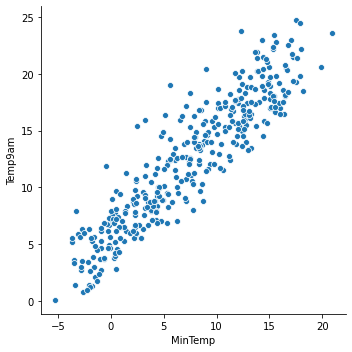

In [23]:
sns.relplot(x='MinTemp',y='Temp9am',data=df)

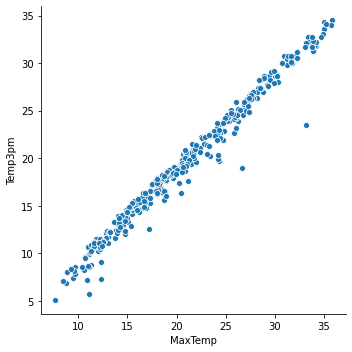

In [24]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=df)

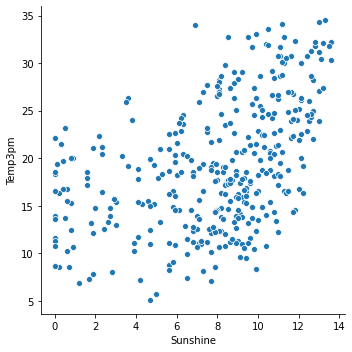

In [25]:
sns.relplot(x='Sunshine',y='Temp3pm',data=df)

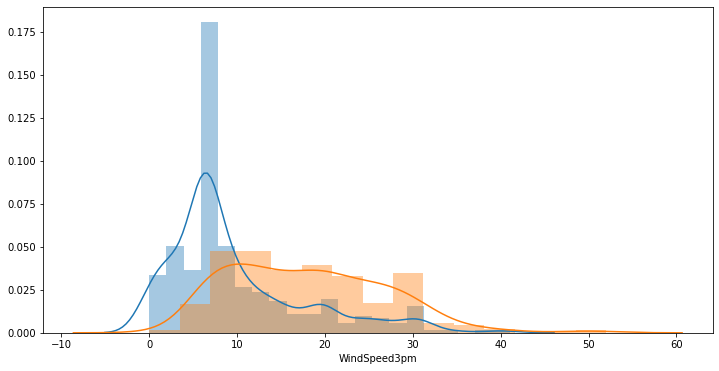

In [26]:
resizeplot()
sns.distplot(df['WindSpeed9am'])
sns.distplot(df['WindSpeed3pm'])

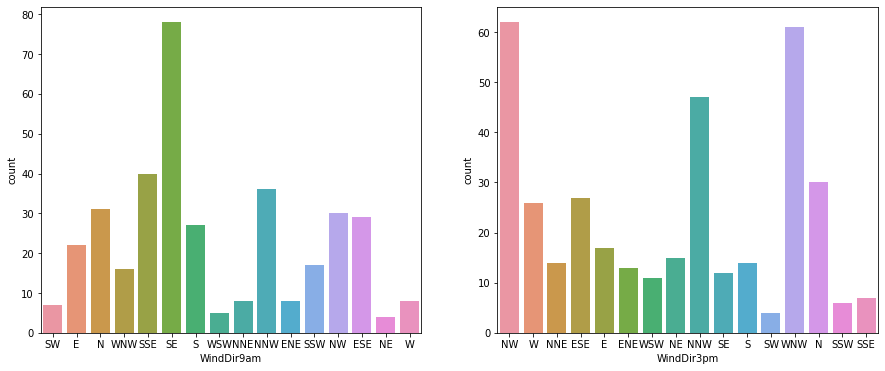

In [27]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.countplot(df['WindDir9am'],ax=ax[0])
sns.countplot(df['WindDir3pm'],ax=ax[1])

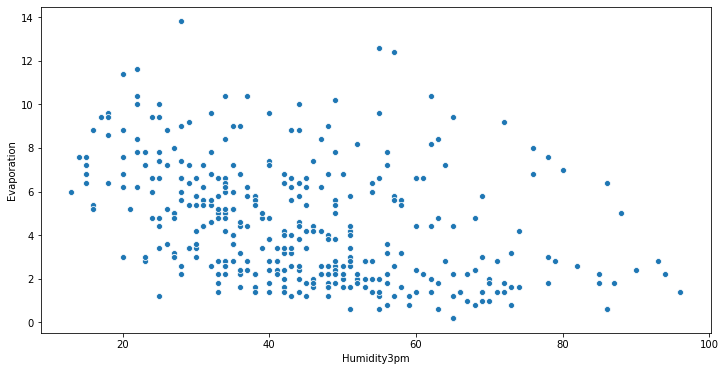

In [28]:
resizeplot()
sns.scatterplot(df['Humidity3pm'],df['Evaporation'])

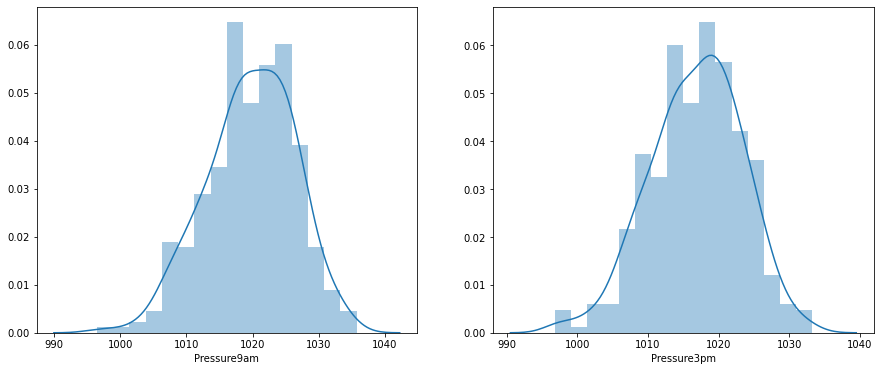

In [29]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(df['Pressure9am'],ax=ax[0])
sns.distplot(df['Pressure3pm'],ax=ax[1])

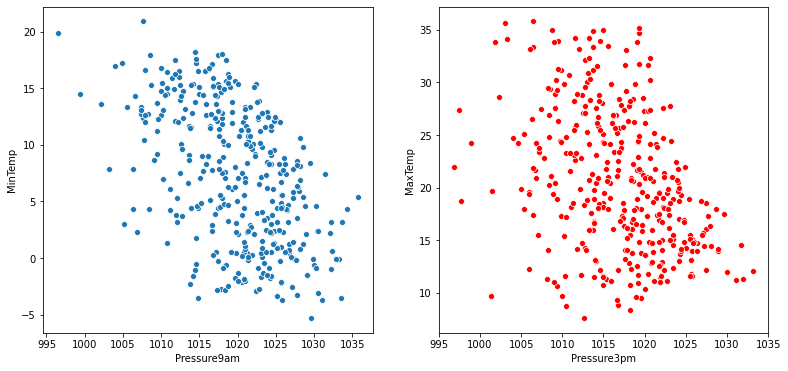

In [30]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df,x='Pressure9am',y='MinTemp',ax=ax[0])
sns.scatterplot(data=df,x='Pressure3pm',y='MaxTemp',ax=ax[1],color='red')

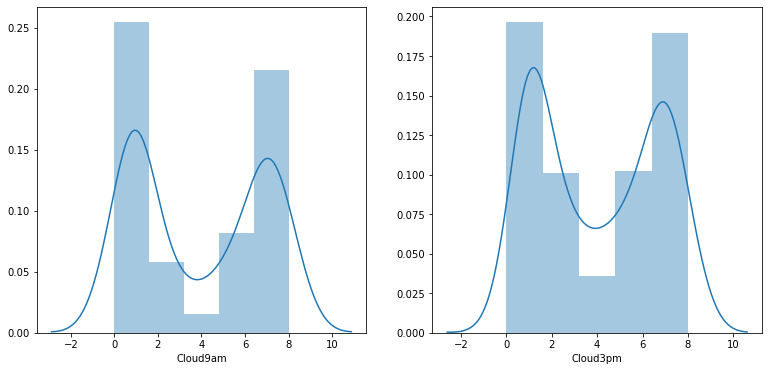

In [31]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.distplot(df['Cloud9am'],ax=ax[0])
sns.distplot(df['Cloud3pm'],ax=ax[1])

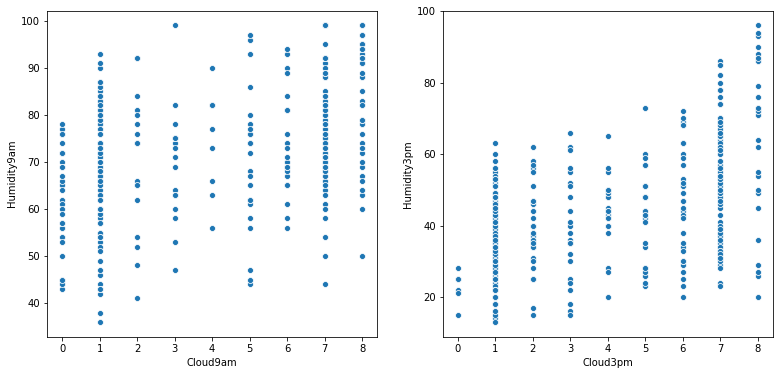

In [32]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df, x='Cloud9am',y='Humidity9am',ax=ax[0])
sns.scatterplot(data=df,x='Cloud3pm',y='Humidity3pm',ax=ax[1])

In [33]:
df[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
    'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
    'Temp3pm']].groupby(df['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [34]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
LB = LabelBinarizer()

In [36]:
df['WindGustDir'] = LB.fit_transform(df[['WindGustDir']])

In [37]:
df['WindDir9am'] = LB.fit_transform(df[['WindDir9am']])

In [38]:
df['WindDir3pm'] = LB.fit_transform(df[['WindDir3pm']])

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
LE = LabelEncoder()

In [41]:
df['RainToday'] = LE.fit_transform(df['RainToday'])

In [42]:
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])

In [43]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
minmax = MinMaxScaler()

In [48]:
X = minmax.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

* Let's go to the predictor algorithms.

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
previsor_dtree = dtree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       103
           1       0.33      0.39      0.36        18

    accuracy                           0.79       121
   macro avg       0.61      0.63      0.62       121
weighted avg       0.81      0.79      0.80       121

[[89 14]
 [11  7]]


Acurácia: 79.3 %


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=200)

In [58]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
previsor_rfc = rfc.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print(classification_report(y_test,previsor_rfc))
print(confusion_matrix(y_test,previsor_rfc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_rfc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       103
           1       0.80      0.22      0.35        18

    accuracy                           0.88       121
   macro avg       0.84      0.61      0.64       121
weighted avg       0.87      0.88      0.84       121

[[102   1]
 [ 14   4]]


Acurácia: 87.6 %


In [62]:
from sklearn.svm import SVC

In [63]:
model = SVC()

In [64]:
model.fit(X_train, y_train)

SVC()

In [65]:
previsor_svc = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       103
           1       0.67      0.11      0.19        18

    accuracy                           0.86       121
   macro avg       0.77      0.55      0.56       121
weighted avg       0.83      0.86      0.81       121

[[102   1]
 [ 16   2]]


Acurácia: 86.0 %


In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
LR = LogisticRegression()

In [70]:
LR.fit(X_train,y_train)

LogisticRegression()

In [71]:
predict_LR = LR.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Acurácia:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       103
           1       0.86      0.33      0.48        18

    accuracy                           0.89       121
   macro avg       0.88      0.66      0.71       121
weighted avg       0.89      0.89      0.87       121

[[102   1]
 [ 12   6]]


Acurácia: 89.3 %


In [74]:
Acuracia_LR = np.round(accuracy_score(y_test,predict_LR),3) *100
Acuracia_svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
Acuracia_rfc = np.round(accuracy_score(y_test,previsor_rfc),3)*100
Acuracia_dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100


In [75]:
print('Acurácia_Decision_tree: ',Acuracia_dtree,'%')
print('Acurácia_Random_Forest: ', Acuracia_rfc,'%')
print('Acurácia_LR: ', Acuracia_LR,'%')
print('Acurácia_SVC: ', Acuracia_svc,'%')

Acurácia_Decision_tree:  79.3 %
Acurácia_Random_Forest:  87.6 %
Acurácia_LR:  89.3 %
Acurácia_SVC:  86.0 %
